# Tutorial of network schematas - Bio Models
The network schematas for biological relevant boolean network models

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from __future__ import division
import os
import math
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2g}'.format
import graphviz
import cana
import matplotlib as mpl
import random
mpl.rc('font', **{'size':16})
import matplotlib.pyplot as plt
from cana.datasets.bio import THALIANA, DROSOPHILA, BUDDING_YEAST
from IPython.display import display, Image, Latex, SVG, HTML
import subprocess

RuntimeError: Python is not installed as a framework. The Mac OS X backend will not be able to function correctly if Python is not installed as a framework. See the Python documentation for more information on installing Python as a framework on Mac OS X. Please either reinstall Python as a framework, or try one of the other backends. If you are Working with Matplotlib in a virtual enviroment see 'Working with Matplotlib in Virtual environments' in the Matplotlib FAQ

In [4]:
def multi_column_display(objs, titles=['',''], cols=2):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'><h3>{{title}}</h3>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=obj,title=title) for obj,title in zip(objs,titles) ]
    cells += (cols - (len(objs)%cols)) * [html_cell.format(content="",title="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))

In [95]:
N = THALIANA()
#N = DROSOPHILA()
#N = BUDDING_YEAST()
print N

<BNetwork(Name='Arabidopsis Thaliana', N=15, Nodes=['AP3', 'UFO', 'FUL', 'FT', 'AP1', 'EMF1', 'LFY', 'AP2', 'WUS', 'AG', 'LUG', 'CLF', 'TFL1', 'PI', 'SEP'])>


## Effective Graph

In [96]:
Nsg = N.structural_graph()

In [97]:
# Node Position for each one of the models
nodes = {d['label']:i for i,d in Nsg.nodes(data=True)}
print nodes
att = {}
#
if N.name == 'Arabidopsis Thaliana':
    
    # Calculates Node position in a circle. Used to plot nodes always in the same position.
    for deg,name in zip(range(0,360,30), ['AG', 'AP3', 'PI', 'AP2', 'TFL1', 'FUL', 'AP1', 'FT', 'EMF1', 'LFY', 'SEP', 'WUS']):
        r = 190
        x, y = r*math.cos(math.radians(deg)), r*math.sin(math.radians(deg))
        att[name] = {'x':x,'y':y}
    # Nodes not on the circle. Manually position them = UFO, LUG, CLF
    for name,(x,y) in zip(['UFO','LUG','CLF'], [(240.,160.),(280.,50.),(280.,-50.)]):
        att[name] = {'x':x,'y':y}

elif N.name == 'Drosophila Melanogaster':
    
    x,y = np.linspace(0,500,8,dtype=int), np.linspace(500,0,8,dtype=int)
    att['nWG']    = {'x':x[5],'y':y[0],'fillcolor':'#4f6fb0'}
    att['SLP']    = {'x':x[7],'y':y[1],'fillcolor':'#4f6fb0'}
    att['en']     = {'x':x[5],'y':y[1]}
    att['EN']     = {'x':x[5],'y':y[2]}
    att['nhhnHH'] = {'x':x[1],'y':y[4]}
    att['ci']     = {'x':x[4],'y':y[3]}
    att['PTC']    = {'x':x[2],'y':y[4]}
    att['nhhnHH'] = {'x':x[2],'y':y[2],'fillcolor':'#4f6fb0'}
    att['CI']     = {'x':x[4],'y':y[4]}
    att['PH']     = {'x':x[0],'y':y[5]}
    att['SMO']    = {'x':x[1],'y':y[5]}
    att['CIA']    = {'x':x[3],'y':y[5]}
    att['CIR']    = {'x':x[4],'y':y[5]}
    att['ptc']    = {'x':x[3],'y':y[6]}
    att['wg']     = {'x':x[4],'y':y[6]}
    att['hh']     = {'x':x[6],'y':y[6]}
    att['WG']     = {'x':x[4],'y':y[7]}
    att['HH']     = {'x':x[6],'y':y[7]}

elif N.name == 'Budding Yeast Cell Cycle':
    # Calculates Node position in a circle.
    for deg,name in zip( np.linspace(0,360,10), ['Cln3','MBF','Clb5,6','Mcm1/SFF','Swi5','Cdc20/14','Cdh1','Cln1,2','SBF']):
        r = 190
        deg += 90
        x, y = r*math.cos(math.radians(deg)), r*math.sin(math.radians(deg))
        att[name] = {'x':x,'y':y}
    # Nodes not on the circle. Manually position them = UFO, LUG, CLF
    for name,(x,y) in zip(['CellSize','Sic1','Clb1,2'], [(0.,280.),(0.,100.),(0.,-50.)]):
        att[name] = {'x':x,'y':y}

{'WUS': 8, 'FT': 3, 'AG': 9, 'UFO': 1, 'AP2': 7, 'AP3': 0, 'CLF': 11, 'AP1': 4, 'SEP': 14, 'TFL1': 12, 'EMF1': 5, 'LUG': 10, 'FUL': 2, 'PI': 13, 'LFY': 6}


Nodes: 15 | Edges: 44


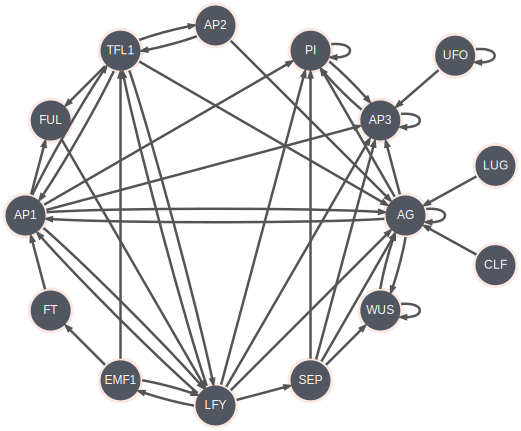

0

In [98]:
# Draw the Structural Graph
S = graphviz.Digraph(name='Structural Graph', engine='neato')
S.attr('graph', concentrate='false', simplify='false')
S.attr('node', shape='circle', fixedsize='true', width='.6', color='#fbeae4', style='filled', fillcolor='#515660', penwidth='3', fontname='Helvetica', fontcolor='white',fontsize='12')
S.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for node,d in Nsg.nodes(data=True):
    if d['label'] in att:
        natt = att[d['label']]
        if 'x' in natt or 'y' in natt:
            x,y = natt['x'] , natt['y']
            xy = '%.2f,%.2f!' % (x/72,y/72)
        if 'fillcolor' in natt:
            fillcolor = natt['fillcolor']
        else:
            fillcolor = '#515660'
    else:
        xy = 'false'
        fillcolor = '#515660'
    S.node(name=str(node), label=d['label'], pos=xy, fillcolor=fillcolor)

max_penwidth = 2.5
for s,t,d in Nsg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    S.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled, )
print 'Nodes: %d | Edges: %d' % (len(Nsg.nodes()) , len(Nsg.edges()) )
# Display
display(SVG(S.pipe(format='svg')),metadata={'isolated':True})
# Export
S._format = 'svg'
efile = u'%s/experiments/SG' % (os.getcwd())
efile = u'%s/experiments/SG' % (os.getcwd())
S.render(efile, cleanup=True)
subprocess.call("inkscape -z %s.svg -e %s.png" % (efile,efile) , shell=True)

In [99]:
# Calculate Effective Graph
threshold = 0.00
Neg = N.effective_graph(mode='input',bound='upper', threshold=threshold)

Nodes: 15 | Edges: 41


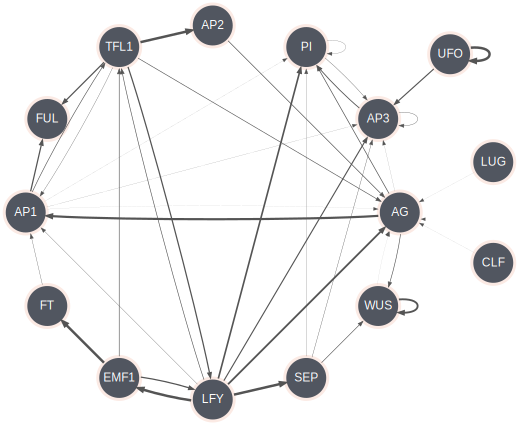

0

In [100]:
# Draw the Effective Graph
E = graphviz.Digraph(name='Effective Graph', engine='neato')
E.attr('graph', concentrate='false', simplify='false')
E.attr('node', shape='circle', fixedsize='true', width='.6', color='#fbeae4', style='filled', fillcolor='#515660', penwidth='3', fontname='Helvetica', fontcolor='white',fontsize='12')
E.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for node,d in Neg.nodes(data=True):
    if d['label'] in att:
        natt = att[d['label']]
        x,y = natt['x'],natt['y']
        xy = '%.1f,%.1f!' % (x/72,y/72)
        if 'fillcolor' in natt:
            fillcolor = natt['fillcolor']
        else:
            fillcolor = '#515660'
    else:
        xy = 'false'
    E.node(name=str(node), label=d['label'], pos=xy, fillcolor=fillcolor)

max_penwidth = 2.5
for s,t,d in Neg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    E.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled)
print 'Nodes: %d | Edges: %d' % (len(Neg.nodes()) , len(Neg.edges()) )
# Display
display(SVG(E.pipe(format='svg')),metadata={'isolated':True})
# Export
E._format = 'svg'
efile = u'%s/experiments/EG' % (os.getcwd())
E.render(efile, cleanup=True)
subprocess.call("inkscape -z %s.svg -e %s.png" % (efile,efile) , shell=True)

In [101]:
bound = 'upper'
df = pd.DataFrame({
        'node':[n.name for n in N.nodes],
        'k':[n.k for n in N.nodes],
        'k_r':[n.input_redundancy(mode='node',bound=bound,norm=False) for n in N.nodes],
        'k_e':[n.effective_connectivity(mode='node',bound=bound,norm=False) for n in N.nodes],
        'k_s':[n.input_symmetry(mode='node',bound=bound,norm=False) for n in N.nodes],
        'k_r*':[n.input_redundancy(mode='node',bound=bound,norm=True) for n in N.nodes],
        'k_e*':[n.effective_connectivity(mode='node',bound=bound,norm=True) for n in N.nodes],
        'k_s*':[n.input_symmetry(mode='node',bound=bound,norm=True) for n in N.nodes],
        'k_e(out-d)':Neg.out_degree().values(),
        'k_e(out-s)':Neg.out_degree(weight='weight').values()
    }).set_index('node')
df = df[['k','k_r','k_e','k_s','k_r*','k_e*','k_s*','k_e(out-d)','k_e(out-s)']]

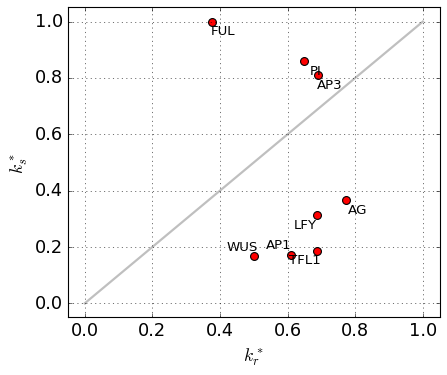

In [103]:
fig, ax = plt.subplots(1,1,figsize=(6,5), sharex=True, sharey=True)
dfp = df.loc[ (df['k']>1) , :]
ax.scatter(dfp['k_r*'],dfp['k_s*'], s=50, c='red', marker='o', zorder=2)
lx,ly = [],[]
quadrants = [-0.035,0.035]
for name, dfp_ in dfp.iterrows():
    x,y = dfp_['k_r*']+random.choice(quadrants) , dfp_['k_s*']+random.choice(quadrants)
    ax.annotate(name, (x,y),fontsize=12, va='center', ha='center')
    lx.append(x); ly.append(y)
ax.plot((0,1),(0,1),'black', lw=2,alpha=0.25, zorder=1)
ax.grid(True)
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)
ax.set_xlabel('$k_r^*$')
ax.set_ylabel('$k_s^*$')
plt.savefig('experiments/k_sn_vs_k_rn.png', dpi=150)

In [104]:
#df = df.loc[ (df['k']>1) , :]
print df.sort_values('k',ascending=False).to_latex()
"""
multi_column_display([
        df[['k']].sort_values('k',ascending=False).to_html(),
        df[['k_r']].sort_values('k_r',ascending=False).to_html(),
        df[['k_e']].sort_values('k_e',ascending=False).to_html(),
        df[['k_s']].sort_values('k_s',ascending=False).to_html(),
        df[['k_r*']].sort_values('k_r*',ascending=False).to_html(),
        df[['k_e*']].sort_values('k_e*',ascending=False).to_html(),
        df[['k_s*']].sort_values('k_s*',ascending=False).to_html(),
        df[['k_e(out-d)']].sort_values('k_e(out-d)',ascending=False).to_html(),
        df[['k_e(out-s)']].sort_values('k_e(out-s)',ascending=False).to_html()
    ],['k','k_r','k_e','k_s','k_r*','k_e*','k_s*','k_e(out-d)','k_e(out-s)'],7 )
"""

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  k &  k\_r &  k\_e &  k\_s &  k\_r* &  k\_e* &  k\_s* &  k\_e(out-d) &  k\_e(out-s) \\
node &    &      &      &      &       &       &       &             &             \\
\midrule
AG   &  9 &  6.9 &  2.1 &  3.3 &  0.77 &  0.23 &  0.37 &           5 &         1.5 \\
AP3  &  7 &  4.8 &  2.2 &  5.7 &  0.69 &  0.31 &  0.81 &           2 &        0.48 \\
PI   &  6 &  3.9 &  2.1 &  5.2 &  0.65 &  0.35 &  0.86 &           2 &        0.23 \\
AP1  &  4 &  2.4 &  1.6 & 0.69 &  0.61 &  0.39 &  0.17 &           5 &        0.85 \\
LFY  &  4 &  2.8 &  1.2 &  1.2 &  0.69 &  0.31 &  0.31 &           7 &         4.2 \\
TFL1 &  4 &  2.8 &  1.2 & 0.75 &  0.69 &  0.31 &  0.19 &           5 &         2.4 \\
WUS  &  3 &  1.5 &  1.5 &  0.5 &   0.5 &   0.5 &  0.17 &           2 &        0.77 \\
FUL  &  2 & 0.75 &  1.2 &    2 &  0.38 &  0.62 &     1 &           0 &           0 \\
UFO  &  1 &    0 &    1 &    0 &     0 &     1 &     0 &           2 &         1.5 \\
FT

"\nmulti_column_display([\n        df[['k']].sort_values('k',ascending=False).to_html(),\n        df[['k_r']].sort_values('k_r',ascending=False).to_html(),\n        df[['k_e']].sort_values('k_e',ascending=False).to_html(),\n        df[['k_s']].sort_values('k_s',ascending=False).to_html(),\n        df[['k_r*']].sort_values('k_r*',ascending=False).to_html(),\n        df[['k_e*']].sort_values('k_e*',ascending=False).to_html(),\n        df[['k_s*']].sort_values('k_s*',ascending=False).to_html(),\n        df[['k_e(out-d)']].sort_values('k_e(out-d)',ascending=False).to_html(),\n        df[['k_e(out-s)']].sort_values('k_e(out-s)',ascending=False).to_html()\n    ],['k','k_r','k_e','k_s','k_r*','k_e*','k_s*','k_e(out-d)','k_e(out-s)'],7 )\n"

Inputs: ['AP3', 'UFO', 'AP1', 'LFY', 'AG', 'PI', 'SEP']


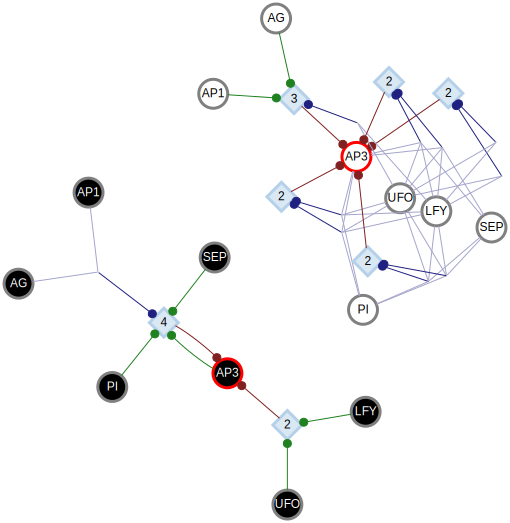

Inputs: ['UFO']


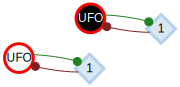

Inputs: ['AP1', 'TFL1']


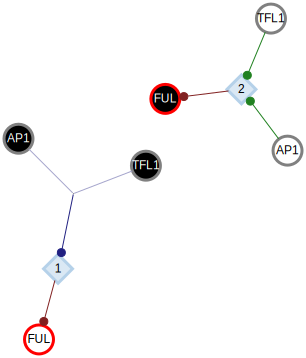

Inputs: ['EMF1']


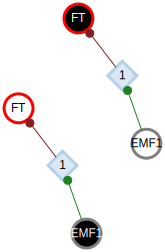

Inputs: ['FT', 'LFY', 'AG', 'TFL1']


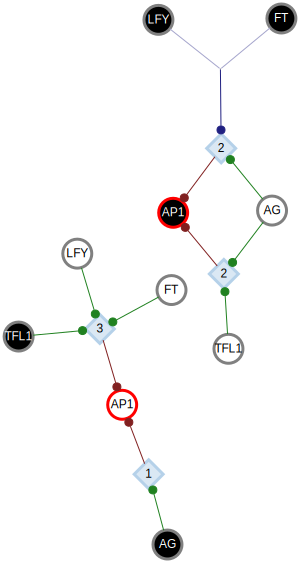

Inputs: ['LFY']


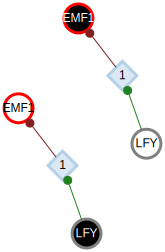

Inputs: ['FUL', 'AP1', 'EMF1', 'TFL1']


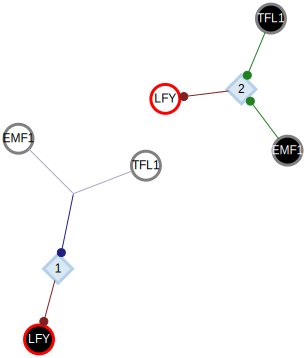

Inputs: ['TFL1']


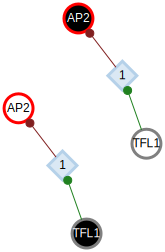

Inputs: ['WUS', 'AG', 'SEP']


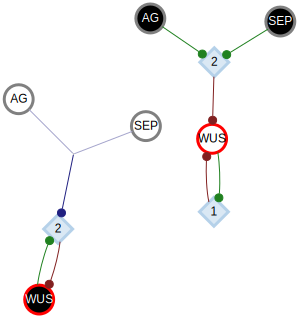

Inputs: ['AP1', 'LFY', 'AP2', 'WUS', 'AG', 'LUG', 'CLF', 'TFL1', 'SEP']


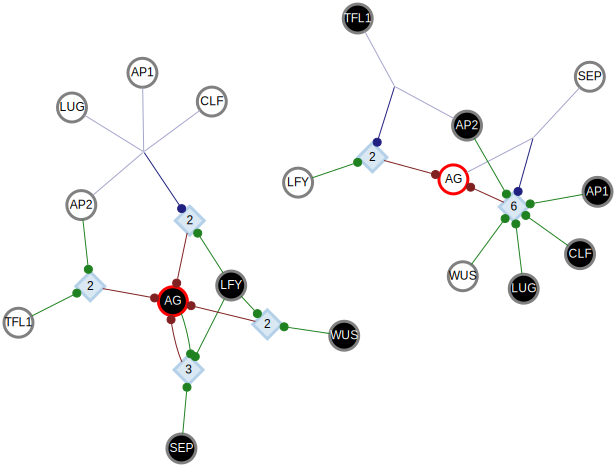

Inputs: []


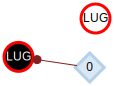

Inputs: []


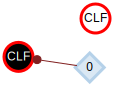

Inputs: ['AP1', 'EMF1', 'LFY', 'AP2']


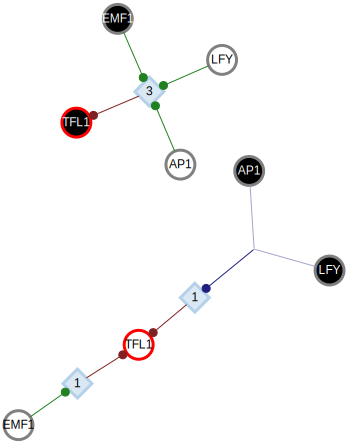

Inputs: ['AP3', 'AP1', 'LFY', 'AG', 'PI', 'SEP']


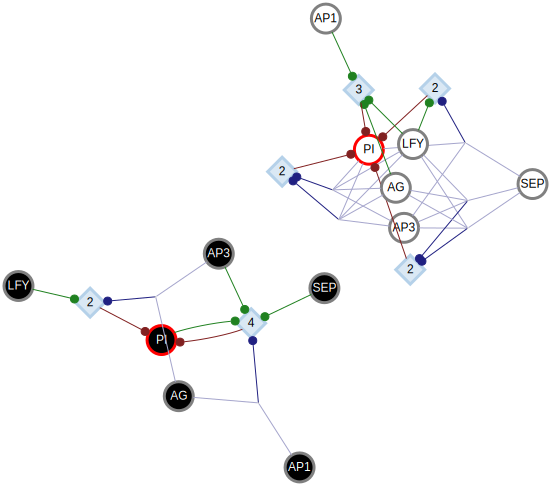

Inputs: ['LFY']


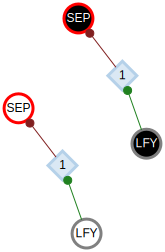

In [105]:
bound = 'upper'
for i,n in enumerate(N.nodes):
    display(HTML('<h2>'+n.name+'</h2>'))
    print 'Inputs:',n.inputs
    k = n.k
    k_r = n.input_redundancy(mode='node',bound=bound,norm=False)
    k_r_n = n.input_redundancy(mode='node',bound=bound,norm=True)
    k_e = n.effective_connectivity(mode='node', bound=bound, norm=False)
    k_s = n.input_symmetry(mode='node',bound=bound,norm=False)
    k_s_n = n.input_symmetry(mode='node',bound=bound,norm=True)
    
    dfS = pd.DataFrame([('k',k),('k_r',k_r),('k_e',k_e),('k_s',k_s),('k_r*',k_r_n),('k_s*',k_s_n)]).set_index(0).T
    #display(dfS)
    
    pi = n.schemata_look_up_table(type='pi',format='latex', ts_symbol_latex="\circ")
    ts = n.schemata_look_up_table(type='ts',format='latex', ts_symbol_latex="\circ")
    #display(Latex(pi))
    #display(Latex(ts))
    #multi_column_display([pi,ts],titles=['Prime Implicants','Two-Symbol Schemtas'],cols=4)

    # to make sure each SVG renders independently, add the "metadata={'isolated':True}
    display(SVG(n.draw_canalizing_map().pipe(format='svg')),metadata={'isolated':True})

    # Export to .SVG
    img = n.draw_canalizing_map() #.pipe(format='png')
    img._format = 'svg'
    efile = u'%s/experiments/%s-%s' % (os.getcwd(),i,n.name)
    img.render(efile, cleanup=True)
    subprocess.call("inkscape -z -d 150 %s.svg -e %s.png" % (efile,efile) , shell=True)

    #break

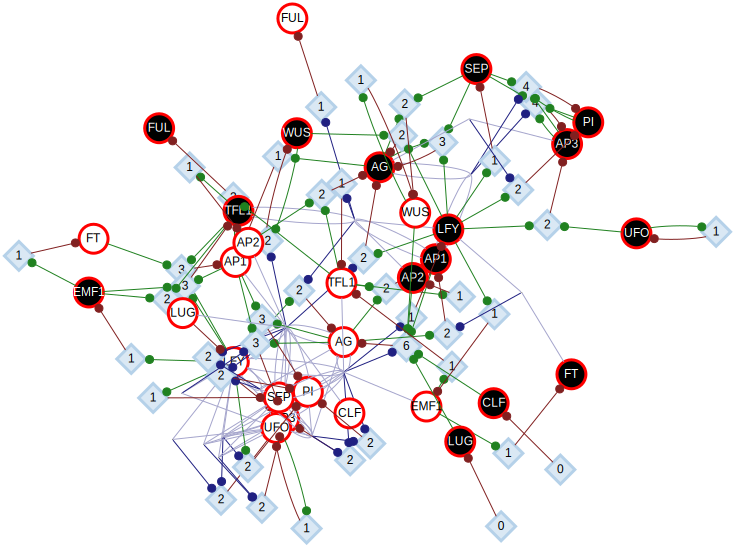

0

In [119]:
import graphviz
DCM = graphviz.Digraph(engine='neato')
for node in N.nodes:
    CM = node.draw_canalizing_map()
    DCM.subgraph(CM)
#
display(DCM)

# Export to .SVG
DCM._format = 'svg'
efile = u'%s/experiments/DCM' % (os.getcwd())
DCM.render(efile, cleanup=True)
subprocess.call("inkscape -z -d 150 %s.svg -e %s.png" % (efile,efile) , shell=True)
